## Multiple linear regression using Hilbert transform

Written by Abirlal Metya, Panini Dasgupta, Manmeet Singh (25/12/2019)

import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, chirp

import hilbert_data1_panini_20CRV2
import datetime


import statsmodels.api as sm

Read Data

In [2]:
x_train,y_train,_ = hilbert_data1_panini_20CRV2.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test,y_test,_ = hilbert_data1_panini_20CRV2.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))


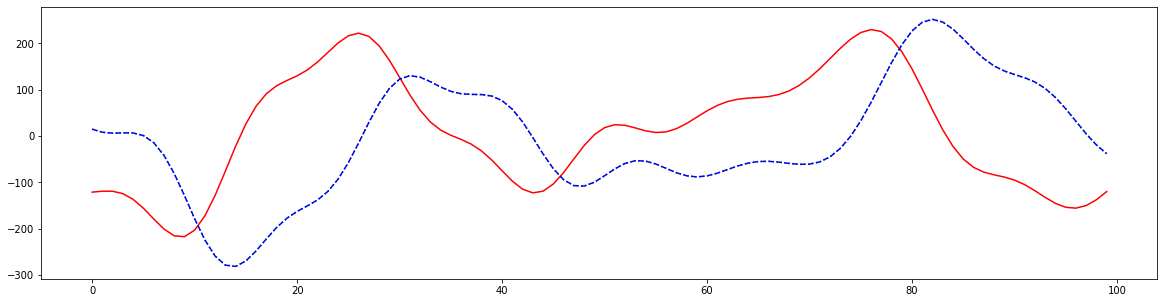

In [3]:
import matplotlib.pyplot as plt#plot the first image in the dataset
from scipy.signal import hilbert
plt.figure(figsize=[20,5])
#plt.imshow(xtrain[1,:,:,0])
plt.plot(np.arange(100),x_train.iloc[0:100,0],'-r')
plt.plot(np.arange(100),np.imag(hilbert(x_train.iloc[:,0])[0:100]),':g')
plt.plot(np.arange(100),x_train.iloc[0:100,12],'--b')

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((10839, 24), (10839, 1), (1266, 24), (1266, 1))

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


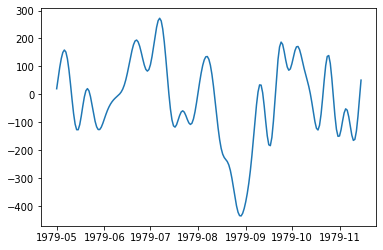

In [5]:
plt.plot(x_train.iloc[1:200,2])

In [6]:
from sklearn import linear_model

In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)
model.coef_

(array([[ 2.10451212e-03,  9.03760476e-06,  6.95779471e-04,
         -3.72447759e-04,  5.44029259e-04,  8.90863353e-04,
         -1.21768647e-03, -6.25958329e-04,  7.34934417e-04,
         -1.06186216e-03,  1.22405444e-03, -3.68987533e-03,
         -2.08312812e-03, -1.90019977e-03, -2.08571558e-04,
          6.34689248e-04, -5.43343395e-04,  3.92447980e-05,
          4.34035601e-04,  5.45291895e-04,  1.99022161e-04,
          2.17478990e-03,  1.41237012e-03, -6.57213209e-04]]),
 array([0.00123796]))

In [8]:
predictions = lm.predict(x_test.values)

In [9]:
predictions.shape

(1266, 1)

In [10]:
(lm.score(x_train.values,y_train.values))**0.5

0.8419530828428547

In [11]:
np.corrcoef(predictions[:,0],y_test.values[:,0])

array([[1.        , 0.86176033],
       [0.86176033, 1.        ]])

Plot different columns

In [12]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

# model.summary()

In [13]:
x_test3 = hilbert_data1_panini_20CRV2.data_pres(datetime.datetime(1946,1,1),datetime.datetime(2012,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions_test.std()
rmm1_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm1_predict.to_csv('rmm1_MLR_20CRV2.txt')

## RMM2

In [14]:
x_train,_,y_train = hilbert_data1_panini_20CRV2.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test,_,y_test = hilbert_data1_panini_20CRV2.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))


In [15]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)

In [16]:
predictions = lm.predict(x_test.values)

In [17]:
(lm.score(x_train.values,y_train.values))**0.5

0.8482478776243304

In [18]:
np.corrcoef(predictions[:,0],y_test.values[:,0])

array([[1.       , 0.8354187],
       [0.8354187, 1.       ]])

In [19]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rmm2   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              1156.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        14:00:36   Log-Likelihood:                         -8494.2
No. Observations:               10839   AIC:                                  1.704e+04
Df Residuals:                   10815   BIC:                                  1.721e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0028      0.000     19.002      0.000       0.003       0.003
1              0.0025      0.000     21.865      0.000       0.002       0.003
2              0.0003   7.69e-05      3.422      0.001       0.000       0.000
3             -0.0011   4.26e-05    -25.598      0.000      -0.001      -0.001
4              0.0001   8.62e-05      1.655      0.098   -2.63e-05       0.000
5              0.0010   8.38e-05     12.517      0.000       0.001       0.001
6             -0.0004   5.07e-05     -8.240      0.000      -0.001      -0.000
7             -0.0016   4.39e-05    -35.692      0.000      -0.002      -0.001
8             -0.0004      0.000     -3.515      0.000      -0.001      -0.000
9             -0.0023   6.45e-05    -35.937      0.000      -0.002      -0.002
10            -0.0016      0.000    -14.194      0.000      -0.002      -0.001
11             0.0012      0.000     10.740      0.000       0.001       0.001
0              0.0011      0.000      7.060      0.000       0.001       0.001
1           9.472e-05      0.000      0.826      0.409      -0.000       0.000
2              0.0006   7.69e-05      7.192      0.000       0.000       0.001
3              0.0009   4.26e-05     21.157      0.000       0.001       0.001
4             -0.0003   8.62e-05     -3.320      0.001      -0.000      -0.000
5              0.0015   8.38e-05     17.770      0.000       0.001       0.002
6             -0.0007   5.07e-05    -14.789      0.000      -0.001      -0.001
7             -0.0002   4.39e-05     -4.202      0.000      -0.000   -9.84e-05
8              0.0012      0.000      9.281      0.000       0.001       0.001
9             -0.0014   6.45e-05    -22.378      0.000      -0.002      -0.001
10             0.0001      0.000      0.910      0.363      -0.000       0.000
11            -0.0033      0.000    -28.852      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       11.808   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.590
Skew:                          -0.005   Prob(JB):                      0.00112
Kurtosis:                       3.173   Cond. No.                         9.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
x_test3 = hilbert_data1_panini_20CRV2.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions.std()
rmm2_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm2_predict.to_csv('rmm2_MLR_20CRV2.txt')